## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [42]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [43]:
print(df.head())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [44]:
df.shape

(2384, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [45]:
df.count()

DATE     2384
TAG      2384
POSTS    2384
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [46]:
df.groupby("TAG").sum()

C:\Users\andre\AppData\Local\Temp\ipykernel_8164\3643815953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,41636
c,389257
c#,1569138
c++,782144
delphi,50316
go,65906
java,1874794
javascript,2448242
perl,67296


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [47]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,172,172
c,172,172
c#,173,173
c++,172,172
delphi,172,172
go,157,157
java,172,172
javascript,172,172
perl,172,172


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [109]:
df.DATE = pd.to_datetime(df.DATE, format="%Y-%m-%d")

In [110]:
print(df["DATE"])

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2379   2022-11-01
2380   2022-11-01
2381   2022-11-01
2382   2022-11-01
2383   2022-11-01
Name: DATE, Length: 2384, dtype: datetime64[ns]


## Data Manipulation



In [111]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [112]:
reshaped_df.shape

(173, 14)

In [113]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [114]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1645.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [115]:
reshaped_df.count()

TAG
assembly      172
c             172
c#            173
c++           172
delphi        172
go            157
java          172
javascript    172
perl          172
php           172
python        172
r             170
ruby          172
swift         164
dtype: int64

In [116]:
reshaped_df = reshaped_df.fillna(0)

In [117]:
print(reshaped_df.isna().values.any()) # check if there are any NaN values
reshaped_df.head()

False


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1645.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0


## Data Visualisaton with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

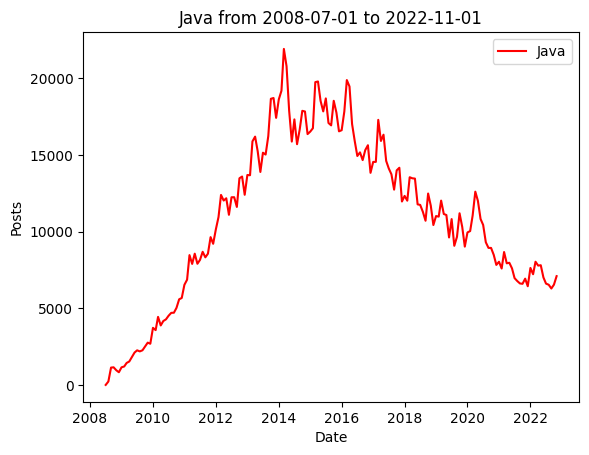

In [140]:
plt.xlabel("Date")
plt.ylabel("Posts")
plt.title(f"Java from {str(reshaped_df.index[0])[:10]} to {str(reshaped_df.index[-1])[:10]}")
plt.plot(reshaped_df.index, reshaped_df["java"], label="Java", color="Red")
plt.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

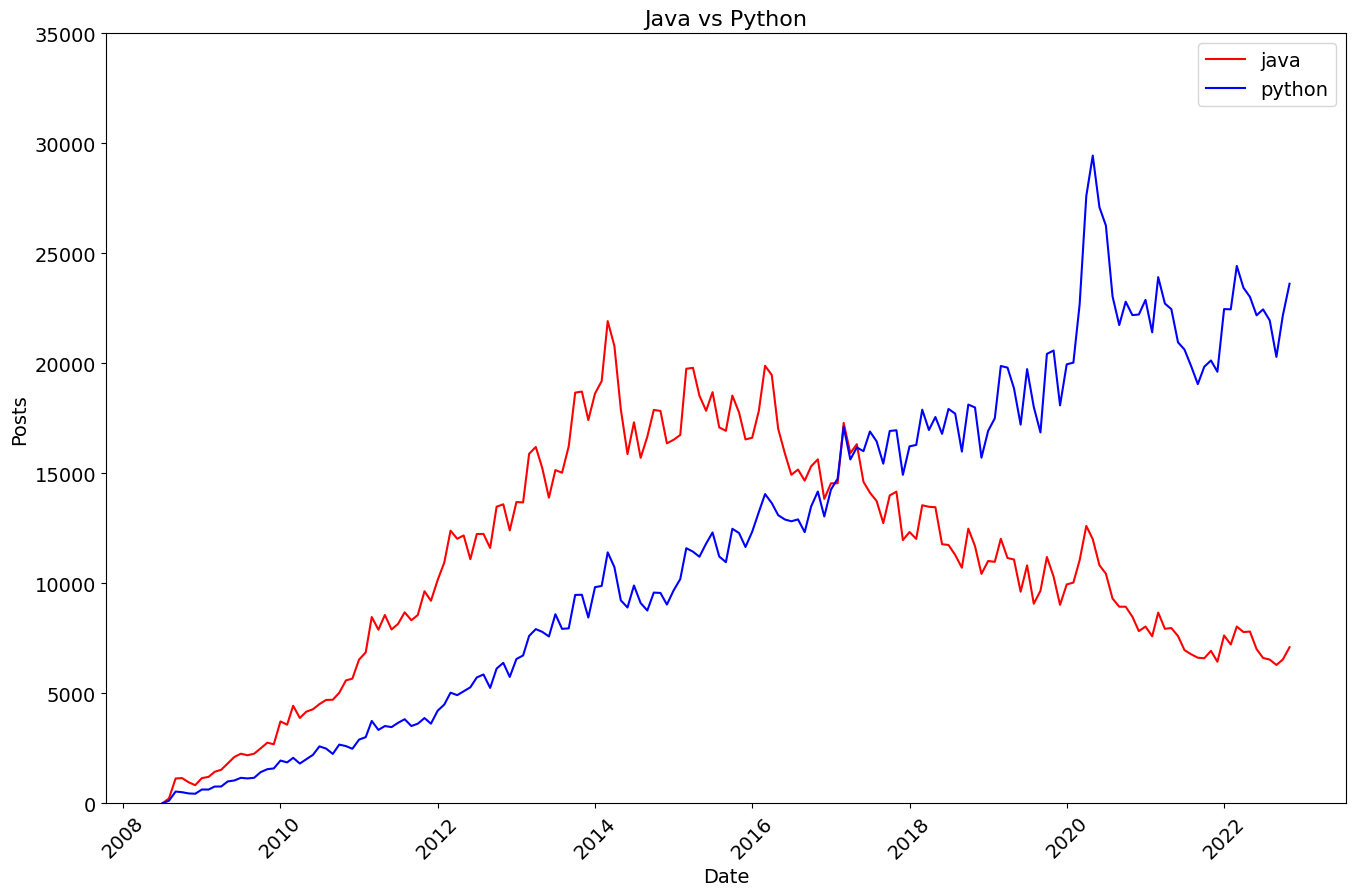

In [180]:
plt.figure(figsize=(16,10)) # set the size of the figure
plt.xticks(rotation=45, fontsize=14) # rotate the x-axis labels
plt.yticks(fontsize=14) # set the y-axis labels font size
plt.ylim(0, 35000) # set the y-axis limits
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.title("Java vs Python", fontsize=16)
plt.plot(reshaped_df.index, reshaped_df["java"], label="java", color="Red")
plt.plot(reshaped_df.index, reshaped_df["python"], label="python", color="Blue")
plt.legend(fontsize=14)


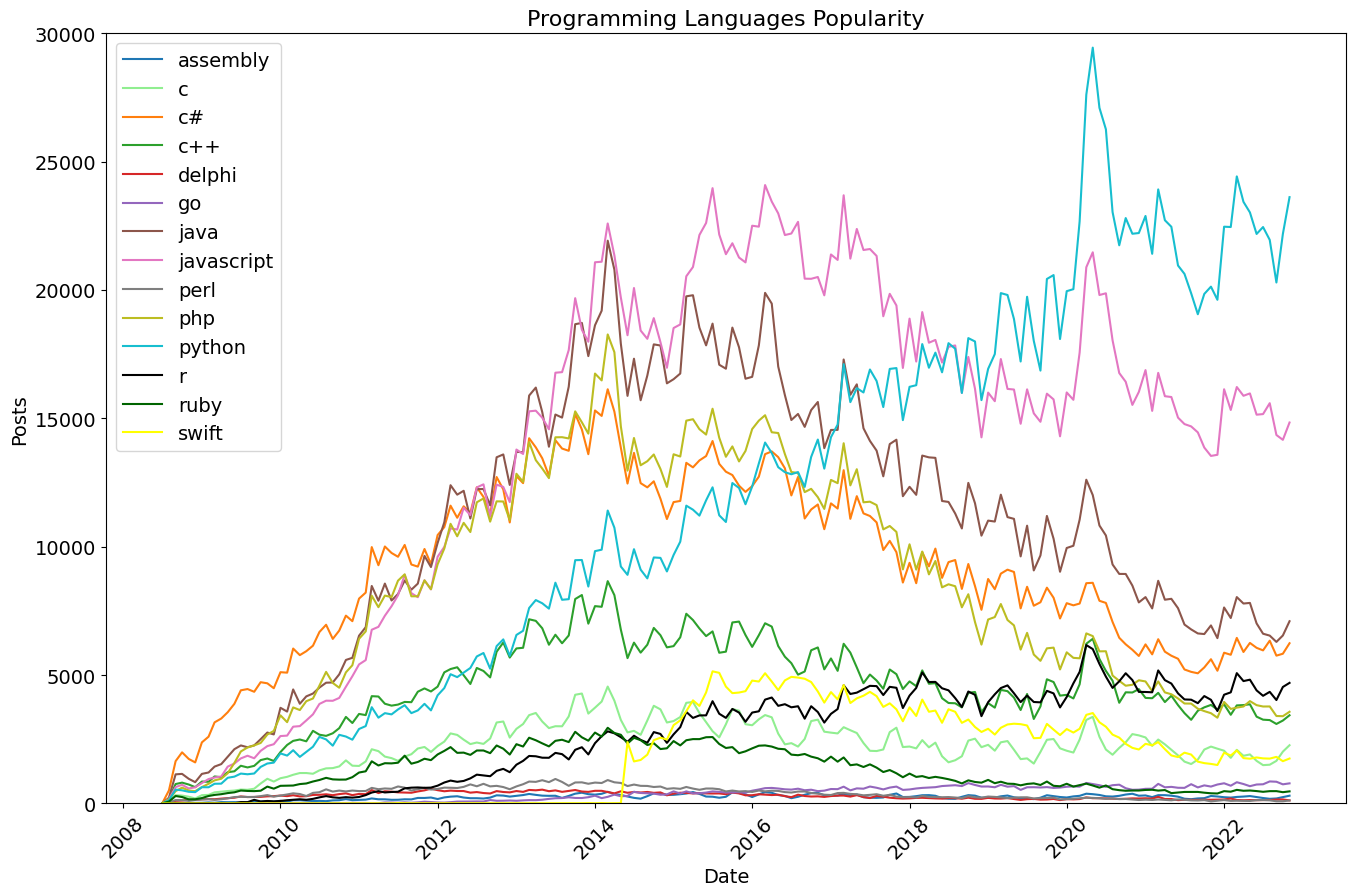

In [219]:
plt.figure(figsize=(16,10)) # set the size of the figure
plt.xticks(rotation=45, fontsize=14) # rotate the x-axis labels
plt.yticks(fontsize=14) # set the y-axis labels font size
plt.ylim(0, 30000) # set the y-axis limits
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.title("Programming Languages Popularity", fontsize=16)
for column in reshaped_df.columns:
    if column == "r":
        plt.plot(reshaped_df.index, reshaped_df[column], label=column, color="Black")
    elif column == "ruby":
        plt.plot(reshaped_df.index, reshaped_df[column], label=column, color="DarkGreen")
    elif column == "c":
        plt.plot(reshaped_df.index, reshaped_df[column], label=column, color="LightGreen")
    elif column == "swift":
        plt.plot(reshaped_df.index, reshaped_df[column], label=column, color="Yellow")
    else:
        plt.plot(reshaped_df.index, reshaped_df[column], label=column)
    plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

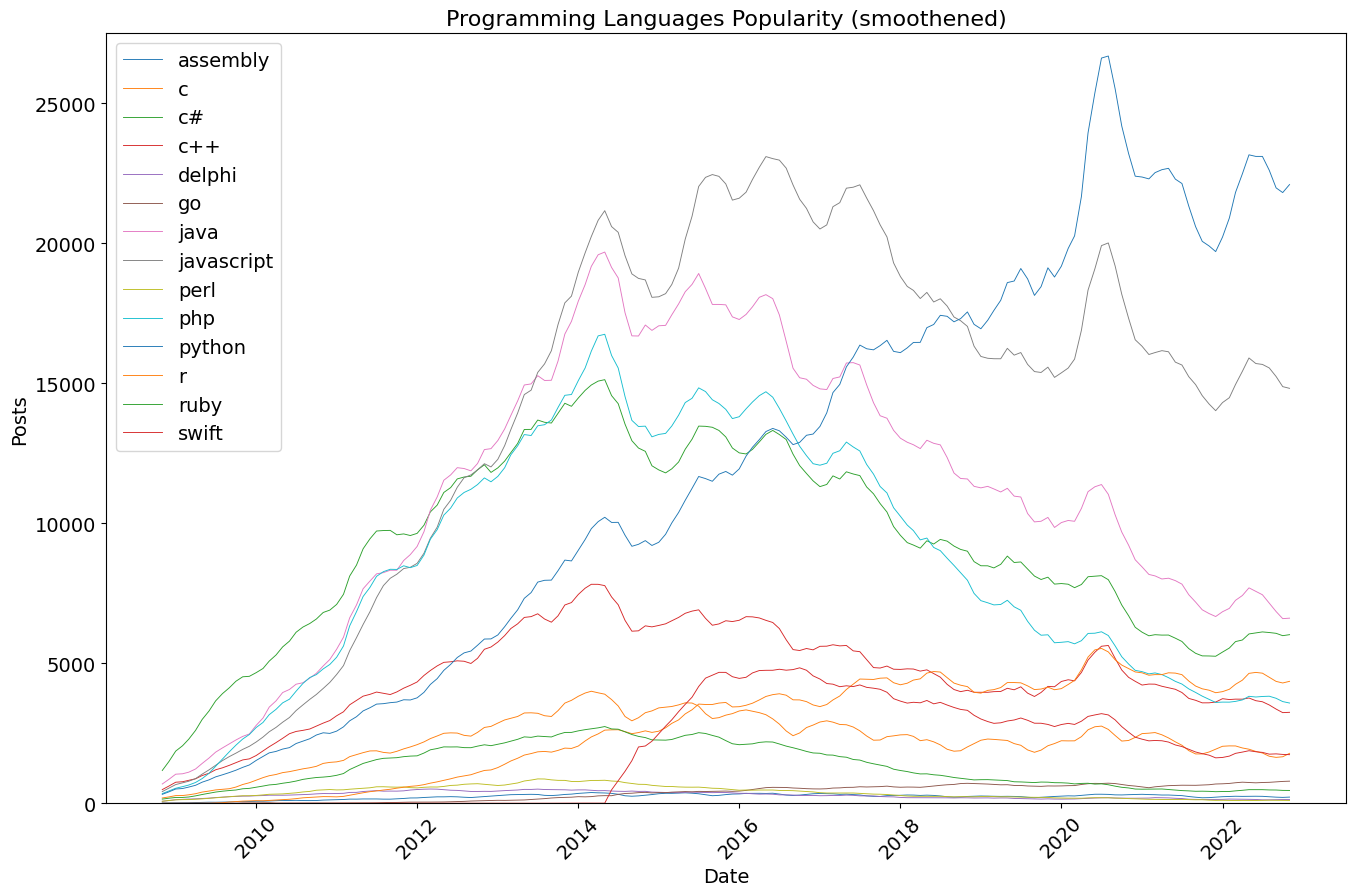

In [226]:
smoothened_df = reshaped_df.rolling(window=5).mean() # smoothen the data
plt.figure(figsize=(16,10)) # set the size of the figure
plt.xticks(rotation=45, fontsize=14) # rotate the x-axis labels
plt.yticks(fontsize=14) # set the y-axis labels font size
plt.ylim(0, 27500) # set the y-axis limits
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.title("Programming Languages Popularity (smoothened)", fontsize=16)
for column in smoothened_df.columns:
    plt.plot(smoothened_df.index, smoothened_df[column], label=column, linewidth=0.65)
    plt.legend(fontsize=14)